In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor

In [2]:
!wget -O "weather.xls.gz" "https://ru6.rp5.ru/download/files.synop/28/28900.01.01.2020.20.11.2025.1.0.0.ru.utf8.00000000.xls.gz"

!gzip -df "weather.xls.gz"

--2025-11-20 16:05:12--  https://ru6.rp5.ru/download/files.synop/28/28900.01.01.2020.20.11.2025.1.0.0.ru.utf8.00000000.xls.gz
Resolving ru6.rp5.ru (ru6.rp5.ru)... 37.9.3.252
Connecting to ru6.rp5.ru (ru6.rp5.ru)|37.9.3.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1389763 (1.3M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.33M   629KB/s    in 2.2s    

2025-11-20 16:05:15 (629 KB/s) - ‘weather.xls.gz’ saved [1389763/1389763]



In [3]:
df = pd.read_excel("weather.xls", skiprows=6)
df

,Местное время в Самаре,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,20.11.2025 16:00,2.6,757.1,770.0,0.7,64.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10,-3.6,NaN,NaN,NaN,NaN,NaN,NaN
1,20.11.2025 13:00,3.3,756.4,769.3,1.1,65.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10,-2.8,NaN,NaN,NaN,NaN,NaN,NaN
2,20.11.2025 10:00,1.0,755.3,768.3,1.6,82.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,10,-1.8,NaN,NaN,NaN,NaN,NaN,NaN
3,20.11.2025 07:00,0.8,753.7,766.6,0.4,92.0,"Ветер, дующий с северо-северо-запада",1.0,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10,-0.3,0.9,12.0,NaN,NaN,NaN,NaN
4,20.11.2025 04:00,0.9,753.3,766.2,0.8,94.0,"Ветер, дующий с северо-северо-запада",1.0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10,0.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17200,01.01.2020 13:00,-1.6,737.1,750.1,0.6,96.0,"Ветер, дующий с запада",1.0,NaN,NaN,...,NaN,NaN,10,-2.2,NaN,NaN,NaN,NaN,NaN,NaN
17201,01.01.2020 10:00,-2.2,736.5,749.5,1.1,97.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,10,-2.6,NaN,NaN,NaN,NaN,NaN,NaN
17202,01.01.2020 07:00,-2.5,735.4,748.5,0.9,97.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,...,NaN,NaN,10,-2.9,0.4,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,15
17203,01.01.2020 04:00,-2.4,734.5,747.5,0.0,96.0,"Ветер, дующий с западо-юго-запада",2.0,NaN,NaN,...,NaN,NaN,10,-2.9,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Местное время в Самаре', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [5]:
# T - температура воздуха (градусы Цельсия) на высоте 2м от поверхности земли
# P0 - атмосферное давление на уровне станции (мм рт ст)
# U - относительная влажность (%) на высоте 2м от поверхности земли
# D0 - направлениеиветра (румбы) на высоте 10-12м, осреднённое за 10 мин период
# N - общая облачность
# Td - температура точки росы на высоте 2м (градусы Цельсия)
# RRR - количество выпавших осадком (мм)
# tR - количество времени (часы), за которое накоплено указанное кол-во осадков
# sss - высота снежного покрова (см)

In [6]:
df = df[df["T"].notna()]
df["date"] = pd.to_datetime(df["Местное время в Самаре"], dayfirst=True)

/tmp/ipython-input-3624050357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["Местное время в Самаре"], dayfirst=True)


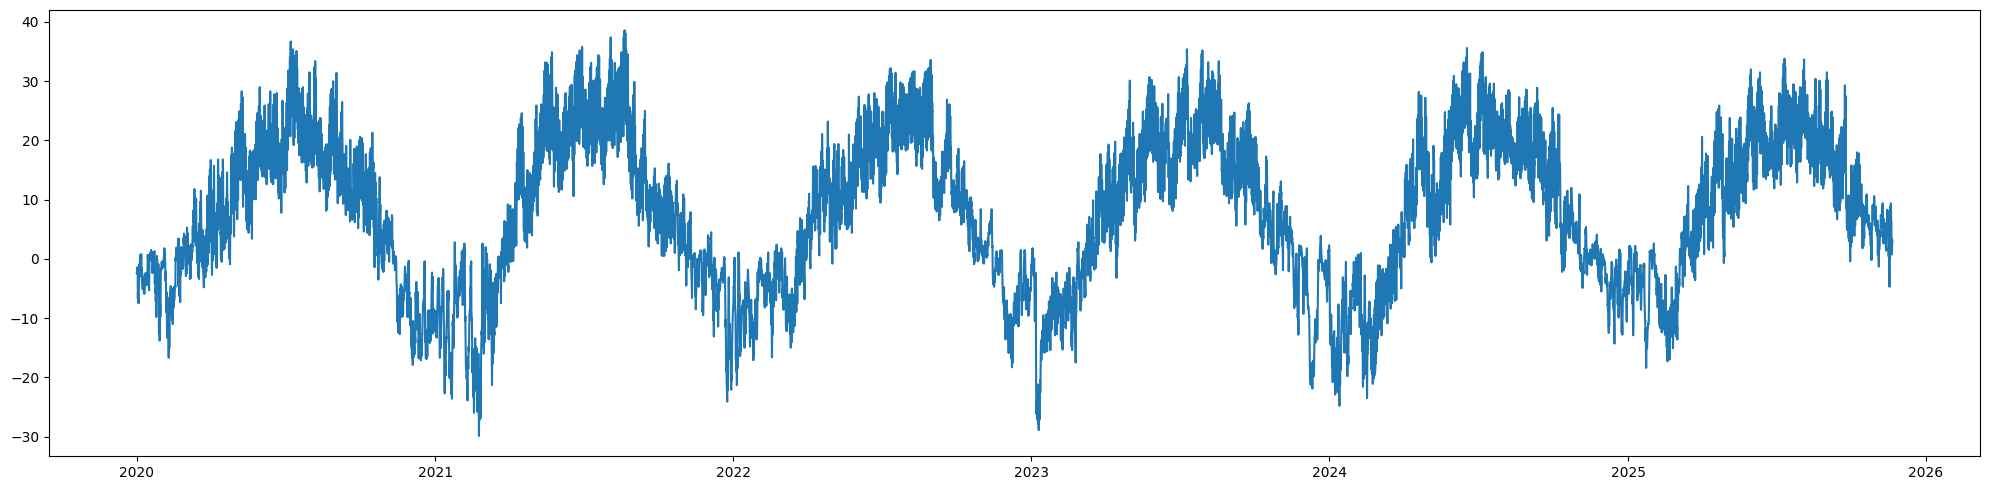

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(df["date"], df["T"])

plt.tight_layout()
plt.show()

In [8]:
df["dayofyear"] = df["date"].dt.dayofyear
df

/tmp/ipython-input-4122003602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dayofyear"] = df["date"].dt.dayofyear


,Местное время в Самаре,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,VV,Td,RRR,tR,E,Tg,E',sss,date,dayofyear
0,20.11.2025 16:00,2.6,757.1,770.0,0.7,64.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,...,10,-3.6,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-20 16:00:00,324
1,20.11.2025 13:00,3.3,756.4,769.3,1.1,65.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,...,10,-2.8,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-20 13:00:00,324
2,20.11.2025 10:00,1.0,755.3,768.3,1.6,82.0,"Штиль, безветрие",0.0,NaN,NaN,...,10,-1.8,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-20 10:00:00,324
3,20.11.2025 07:00,0.8,753.7,766.6,0.4,92.0,"Ветер, дующий с северо-северо-запада",1.0,NaN,NaN,...,10,-0.3,0.9,12.0,NaN,NaN,NaN,NaN,2025-11-20 07:00:00,324
4,20.11.2025 04:00,0.9,753.3,766.2,0.8,94.0,"Ветер, дующий с северо-северо-запада",1.0,NaN,NaN,...,10,0.1,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-20 04:00:00,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17200,01.01.2020 13:00,-1.6,737.1,750.1,0.6,96.0,"Ветер, дующий с запада",1.0,NaN,NaN,...,10,-2.2,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 13:00:00,1
17201,01.01.2020 10:00,-2.2,736.5,749.5,1.1,97.0,"Штиль, безветрие",0.0,NaN,NaN,...,10,-2.6,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 10:00:00,1
17202,01.01.2020 07:00,-2.5,735.4,748.5,0.9,97.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,...,10,-2.9,0.4,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,15,2020-01-01 07:00:00,1
17203,01.01.2020 04:00,-2.4,734.5,747.5,0.0,96.0,"Ветер, дующий с западо-юго-запада",2.0,NaN,NaN,...,10,-2.9,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 04:00:00,1


In [9]:
df["cos_dayofyear"] = np.cos((df["dayofyear"] - 1) / 366 * 2 * np.pi)
df["sin_dayofyear"] = np.sin((df["dayofyear"] - 1) / 366 * 2 * np.pi)

/tmp/ipython-input-3806944529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cos_dayofyear"] = np.cos((df["dayofyear"] - 1) / 366 * 2 * np.pi)
/tmp/ipython-input-3806944529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sin_dayofyear"] = np.sin((df["dayofyear"] - 1) / 366 * 2 * np.pi)


In [10]:
df

,Местное время в Самаре,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,RRR,tR,E,Tg,E',sss,date,dayofyear,cos_dayofyear,sin_dayofyear
0,20.11.2025 16:00,2.6,757.1,770.0,0.7,64.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-20 16:00:00,324,0.739689,-0.672949
1,20.11.2025 13:00,3.3,756.4,769.3,1.1,65.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-20 13:00:00,324,0.739689,-0.672949
2,20.11.2025 10:00,1.0,755.3,768.3,1.6,82.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-20 10:00:00,324,0.739689,-0.672949
3,20.11.2025 07:00,0.8,753.7,766.6,0.4,92.0,"Ветер, дующий с северо-северо-запада",1.0,NaN,NaN,...,0.9,12.0,NaN,NaN,NaN,NaN,2025-11-20 07:00:00,324,0.739689,-0.672949
4,20.11.2025 04:00,0.9,753.3,766.2,0.8,94.0,"Ветер, дующий с северо-северо-запада",1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-20 04:00:00,324,0.739689,-0.672949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17200,01.01.2020 13:00,-1.6,737.1,750.1,0.6,96.0,"Ветер, дующий с запада",1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 13:00:00,1,1.000000,0.000000
17201,01.01.2020 10:00,-2.2,736.5,749.5,1.1,97.0,"Штиль, безветрие",0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 10:00:00,1,1.000000,0.000000
17202,01.01.2020 07:00,-2.5,735.4,748.5,0.9,97.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,...,0.4,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,15,2020-01-01 07:00:00,1,1.000000,0.000000
17203,01.01.2020 04:00,-2.4,734.5,747.5,0.0,96.0,"Ветер, дующий с западо-юго-запада",2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 04:00:00,1,1.000000,0.000000


In [11]:
x = df[df["date"] <= "2024-06-01"]
y = df[df["date"] > "2024-06-01"]

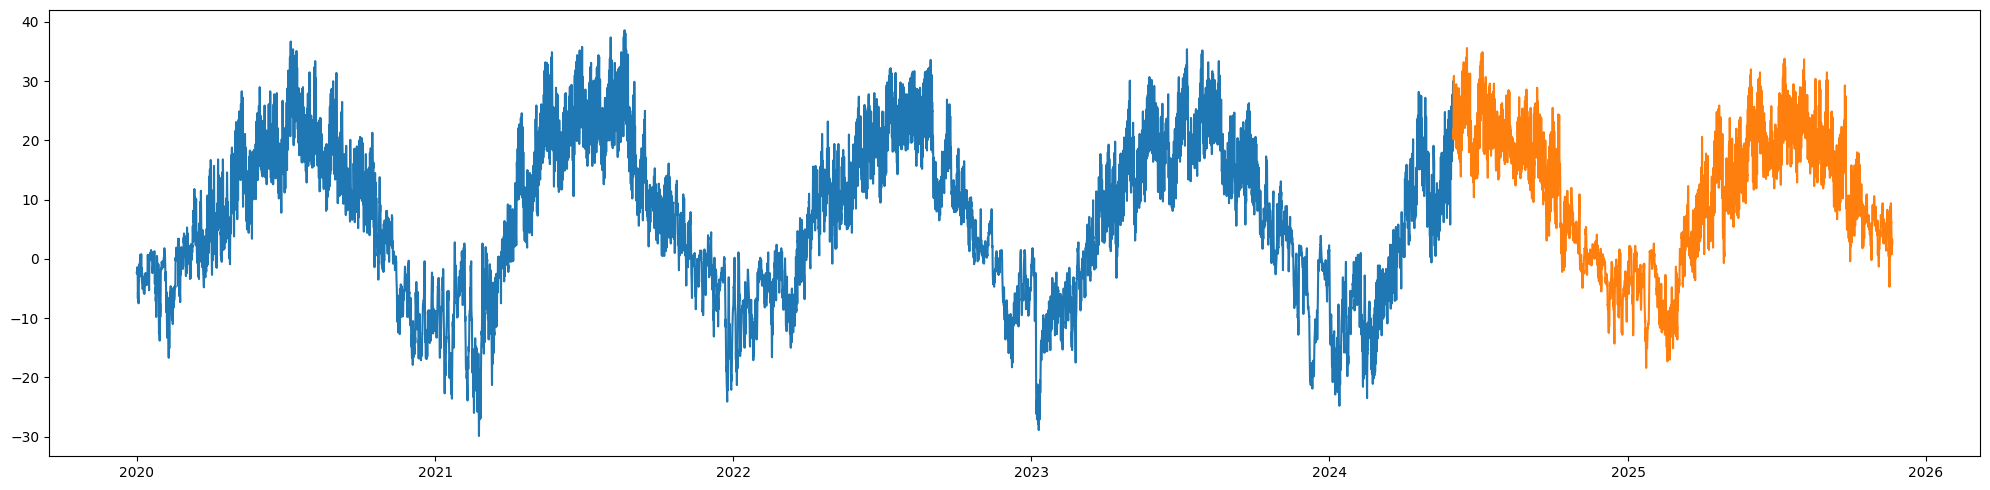

In [12]:
plt.figure(figsize=(20, 5))

plt.plot(x["date"], x["T"])
plt.plot(y["date"], y["T"])

plt.tight_layout()
plt.show()

## Lin + cos

In [13]:
x.head(5)

,Местное время в Самаре,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,RRR,tR,E,Tg,E',sss,date,dayofyear,cos_dayofyear,sin_dayofyear
4302,31.05.2024 22:00,26.4,750.8,762.6,0.2,31.0,"Ветер, дующий с северо-востока",2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-31 22:00:00,152,-0.852864,0.522133
4303,31.05.2024 19:00,29.9,750.6,762.2,-0.6,25.0,"Ветер, дующий с западо-северо-запада",1.0,NaN,NaN,...,Осадков нет,12.0,NaN,NaN,NaN,NaN,2024-05-31 19:00:00,152,-0.852864,0.522133
4304,31.05.2024 16:00,30.0,751.2,762.8,-0.7,24.0,"Ветер, дующий с запада",2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-31 16:00:00,152,-0.852864,0.522133
4305,31.05.2024 13:00,28.4,751.9,763.6,-0.5,26.0,"Ветер, дующий с запада",3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-31 13:00:00,152,-0.852864,0.522133
4306,31.05.2024 10:00,22.7,752.4,764.3,0.8,56.0,"Ветер, дующий с востока",3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-31 10:00:00,152,-0.852864,0.522133


In [14]:
x_train = pd.DataFrame(x["cos_dayofyear"])
x_test = pd.DataFrame(y["cos_dayofyear"])
y_train, y_test = x["T"], y["T"]

In [15]:
LinearRegression_model = LinearRegression().fit(
    x_train,
    y_train
)

y_pred_train = LinearRegression_model.predict(x_train)
y_pred_test = LinearRegression_model.predict(x_test)

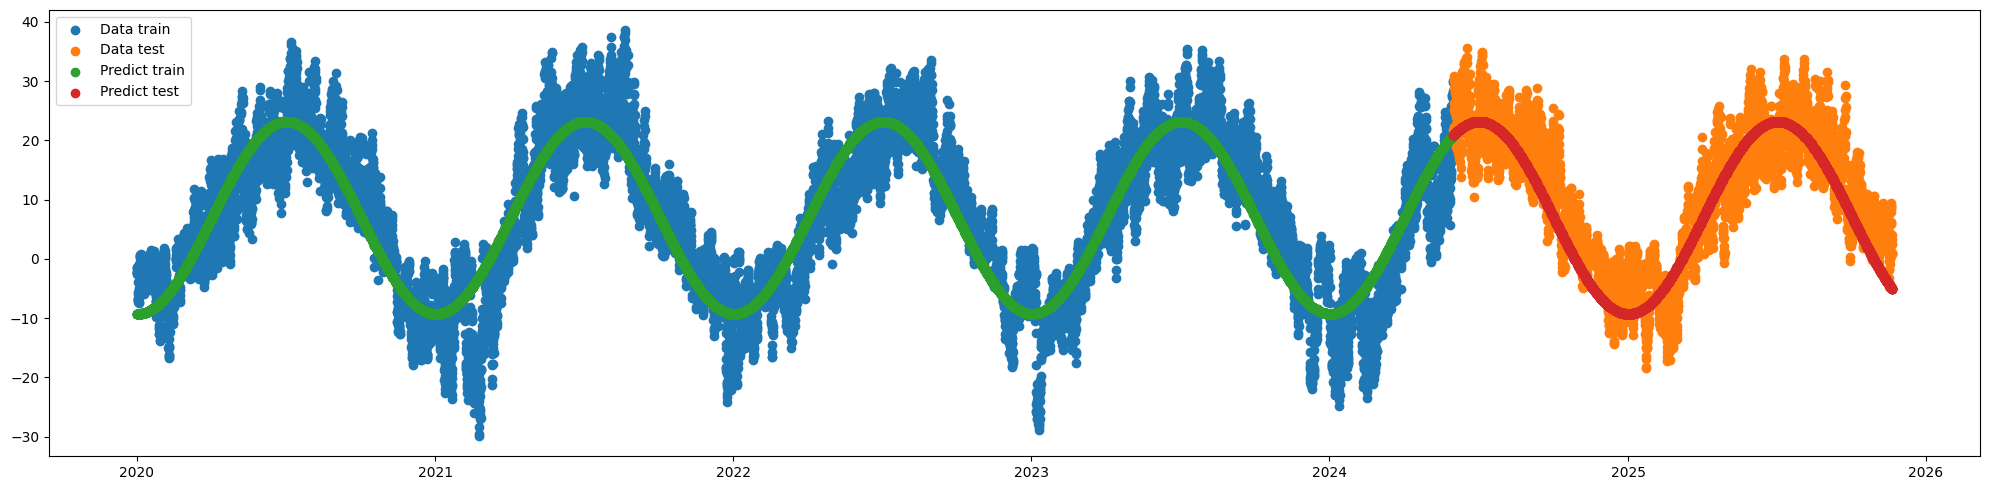

In [16]:
plt.figure(figsize=(20, 5))
plt.scatter(x["date"], y_train, label="Data train")
plt.scatter(y["date"], y_test, label="Data test")
plt.scatter(x["date"], y_pred_train, label="Predict train")
plt.scatter(y["date"], y_pred_test, label="Predict test")
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
comparison = pd.DataFrame(columns = ["model", "mae_train", "mae_test"])
new_row = pd.DataFrame([{
    "model": "LinearRegression",
    "mae_train": mean_absolute_error(y_train, y_pred_train),
    "mae_test": mean_absolute_error(y_test, y_pred_test)
}])
comparison = pd.concat([comparison, new_row], ignore_index=True)

comparison

/tmp/ipython-input-4120973395.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


,model,mae_train,mae_test
0,LinearRegression,4.921479,4.687792


## 1. Lin + sin

In [18]:
x_train = pd.DataFrame(x["sin_dayofyear"])
x_test = pd.DataFrame(y["sin_dayofyear"])

In [19]:
LinearRegression_model = LinearRegression().fit(
    x_train,
    y_train
)

y_pred_train = LinearRegression_model.predict(x_train)
y_pred_test = LinearRegression_model.predict(x_test)

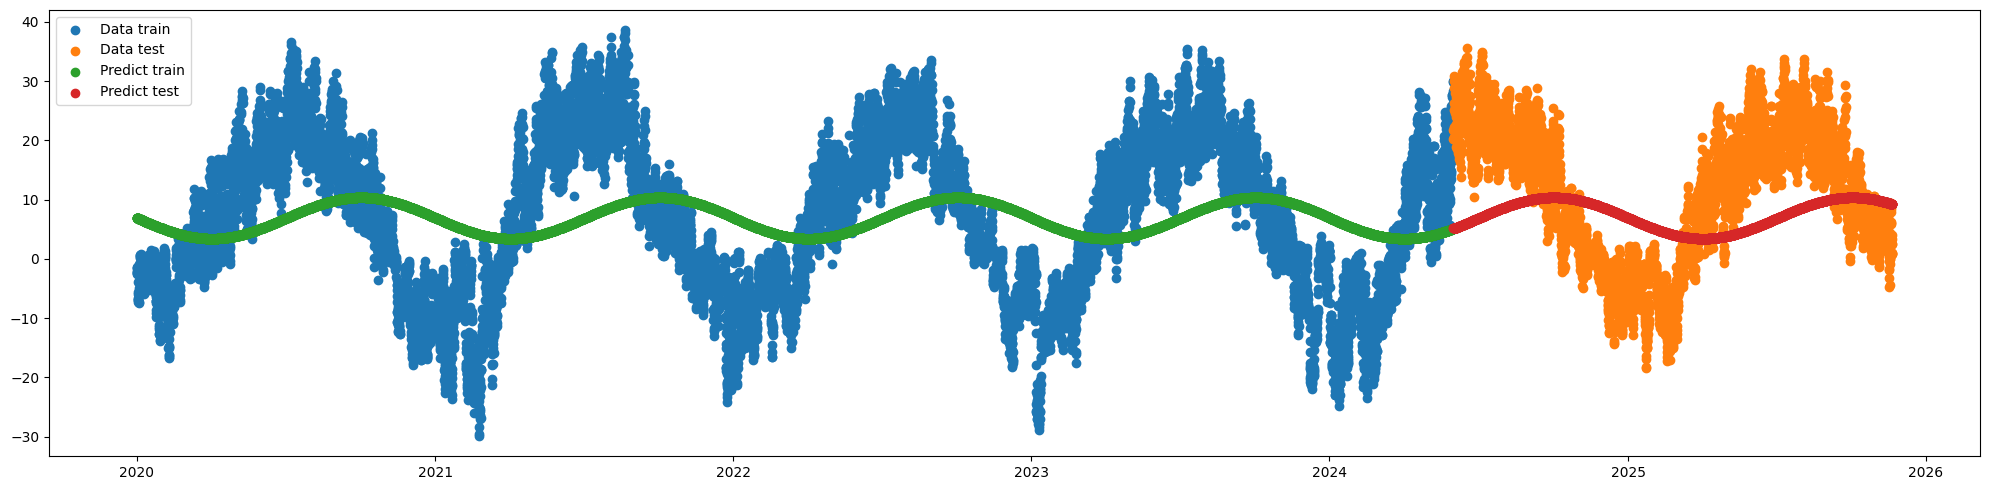

In [20]:
plt.figure(figsize=(20, 5))
plt.scatter(x["date"], y_train, label="Data train")
plt.scatter(y["date"], y_test, label="Data test")
plt.scatter(x["date"], y_pred_train, label="Predict train")
plt.scatter(y["date"], y_pred_test, label="Predict test")
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
comparison = pd.DataFrame(columns = ["model", "mae_train", "mae_test"])
new_row = pd.DataFrame([{
    "model": "LinearRegression",
    "mae_train": mean_absolute_error(y_train, y_pred_train),
    "mae_test": mean_absolute_error(y_test, y_pred_test)
}])
comparison = pd.concat([comparison, new_row], ignore_index=True)

comparison

/tmp/ipython-input-4120973395.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


,model,mae_train,mae_test
0,LinearRegression,10.745586,9.943141


## 2. Lin + L1/L2 + cos

In [22]:
x_train = pd.DataFrame(x["cos_dayofyear"])
x_test = pd.DataFrame(y["cos_dayofyear"])

In [23]:
LinearRegression_pipeline = LinearRegression()
Lasso_pipeline = Lasso()
Ridge_pipeline = Ridge()

LinearRegression_pipeline  = make_pipeline(StandardScaler(), LinearRegression())
Lasso_pipeline = make_pipeline(StandardScaler(), Lasso())
Ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

ensemble = VotingRegressor([
    ("linear", LinearRegression_pipeline),
    ("lasso", Lasso_pipeline),
    ("ridge", Ridge_pipeline)
])

ensemble.fit(x_train, y_train)

y_pred_train = ensemble.predict(x_train)
y_pred_test = ensemble.predict(x_test)

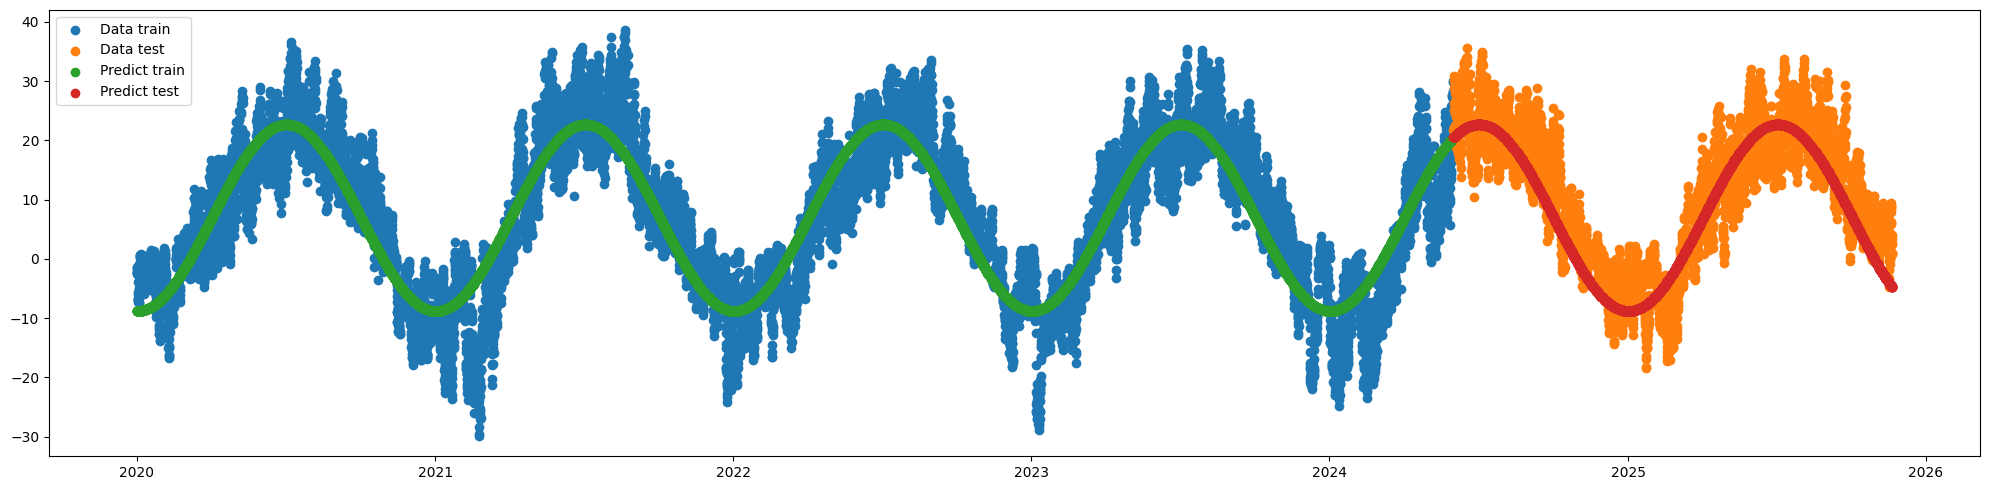

In [24]:
plt.figure(figsize=(20, 5))
plt.scatter(x["date"], y_train, label="Data train")
plt.scatter(y["date"], y_test, label="Data test")
plt.scatter(x["date"], y_pred_train, label="Predict train")
plt.scatter(y["date"], y_pred_test, label="Predict test")
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
comparison = pd.DataFrame(columns = ["model", "mae_train", "mae_test"])
new_row = pd.DataFrame([{
    "model": "LinearRegression",
    "mae_train": mean_absolute_error(y_train, y_pred_train),
    "mae_test": mean_absolute_error(y_test, y_pred_test)
}])
comparison = pd.concat([comparison, new_row], ignore_index=True)

comparison

/tmp/ipython-input-4120973395.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


,model,mae_train,mae_test
0,LinearRegression,4.910707,4.629543


/tmp/ipython-input-3990879981.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


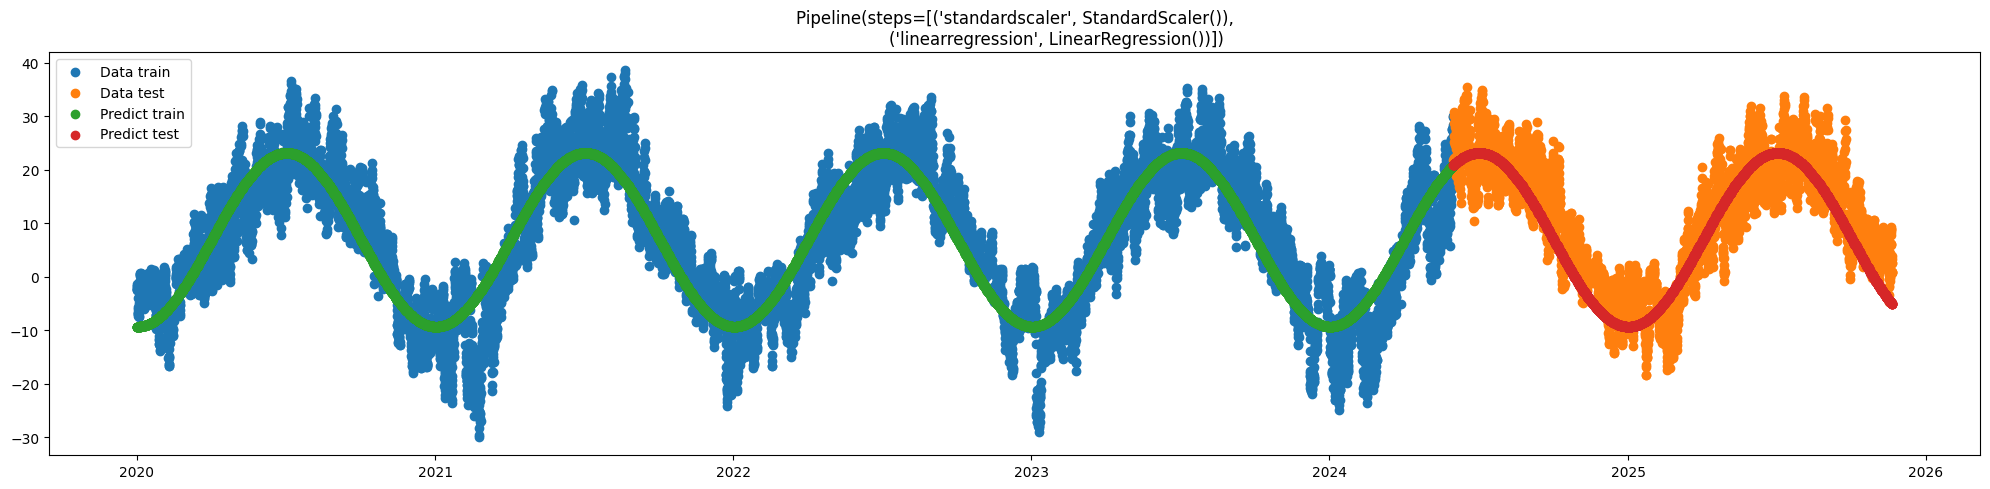

                                    model  mae_train  mae_test
0  (StandardScaler(), LinearRegression())   4.921479  4.687792




/tmp/ipython-input-3990879981.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


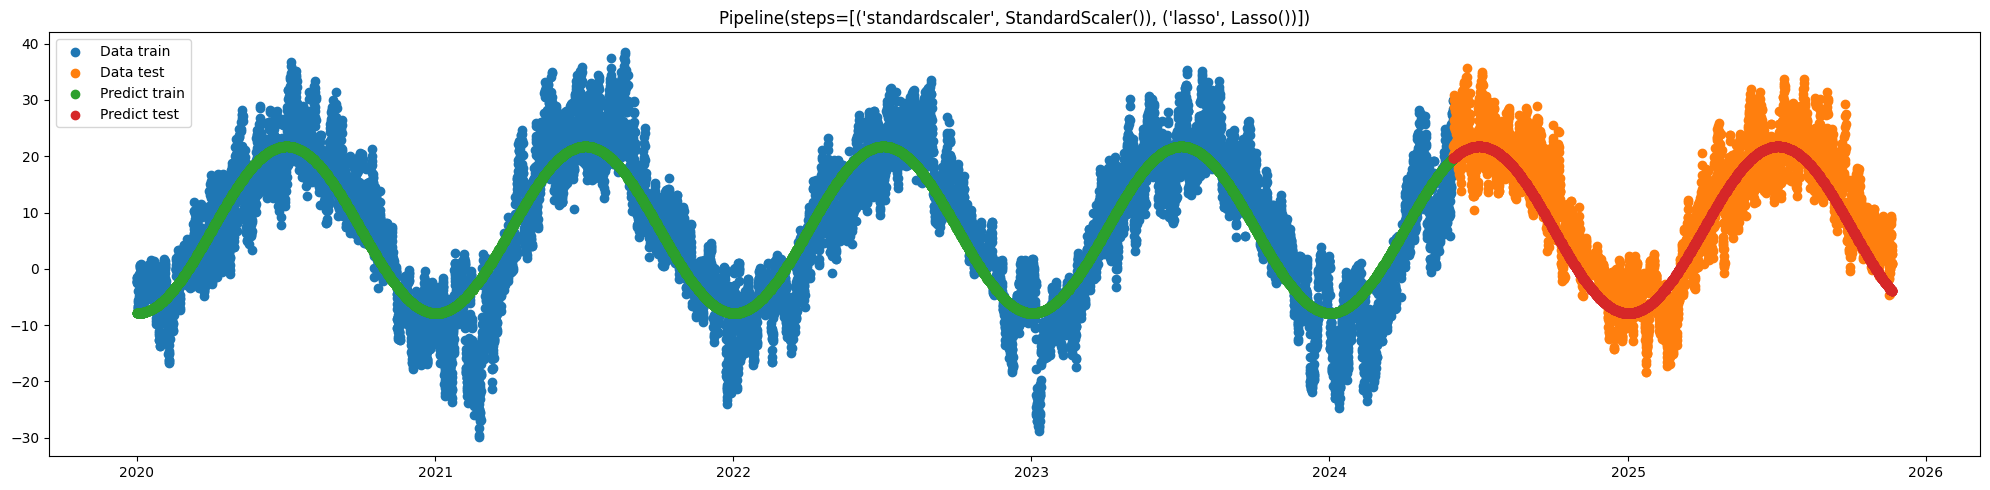

                         model  mae_train  mae_test
0  (StandardScaler(), Lasso())   4.931488  4.558579




/tmp/ipython-input-3990879981.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


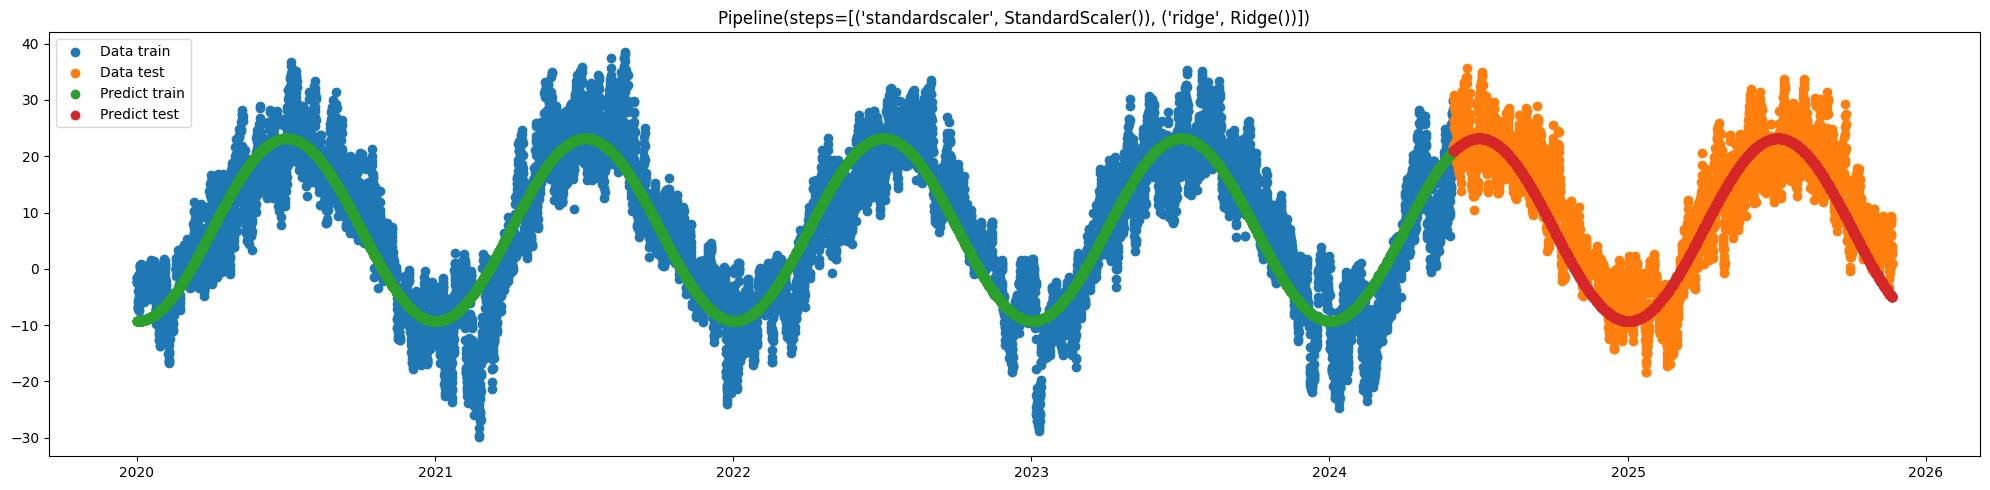

                         model  mae_train  mae_test
0  (StandardScaler(), Ridge())   4.921435  4.687617




In [26]:
LinearRegression_pipeline = LinearRegression()
Lasso_pipeline = Lasso()
Ridge_pipeline = Ridge()

LinearRegression_pipeline  = make_pipeline(StandardScaler(), LinearRegression())
Lasso_pipeline = make_pipeline(StandardScaler(), Lasso())
Ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

pipeline_models = [LinearRegression_pipeline, Lasso_pipeline, Ridge_pipeline]

for i, pipeline_model in enumerate(pipeline_models):
    pipeline_model.fit(x_train, y_train)

    y_pred_train = pipeline_model.predict(x_train)
    y_pred_test = pipeline_model.predict(x_test)

    plt.figure(figsize=(20, 5))
    plt.title(f"{pipeline_model}")
    plt.scatter(x["date"], y_train, label="Data train")
    plt.scatter(y["date"], y_test, label="Data test")
    plt.scatter(x["date"], y_pred_train, label="Predict train")
    plt.scatter(y["date"], y_pred_test, label="Predict test")
    plt.legend()


    comparison = pd.DataFrame(columns = ["model", "mae_train", "mae_test"])
    new_row = pd.DataFrame([{
        "model": pipeline_model,
        "mae_train": mean_absolute_error(y_train, y_pred_train),
        "mae_test": mean_absolute_error(y_test, y_pred_test)
    }])
    comparison = pd.concat([comparison, new_row], ignore_index=True)

    plt.tight_layout()
    plt.show()
    print(comparison)
    print("\n")

## 3. Lin + L2 + another solver + cos

/tmp/ipython-input-1801915320.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


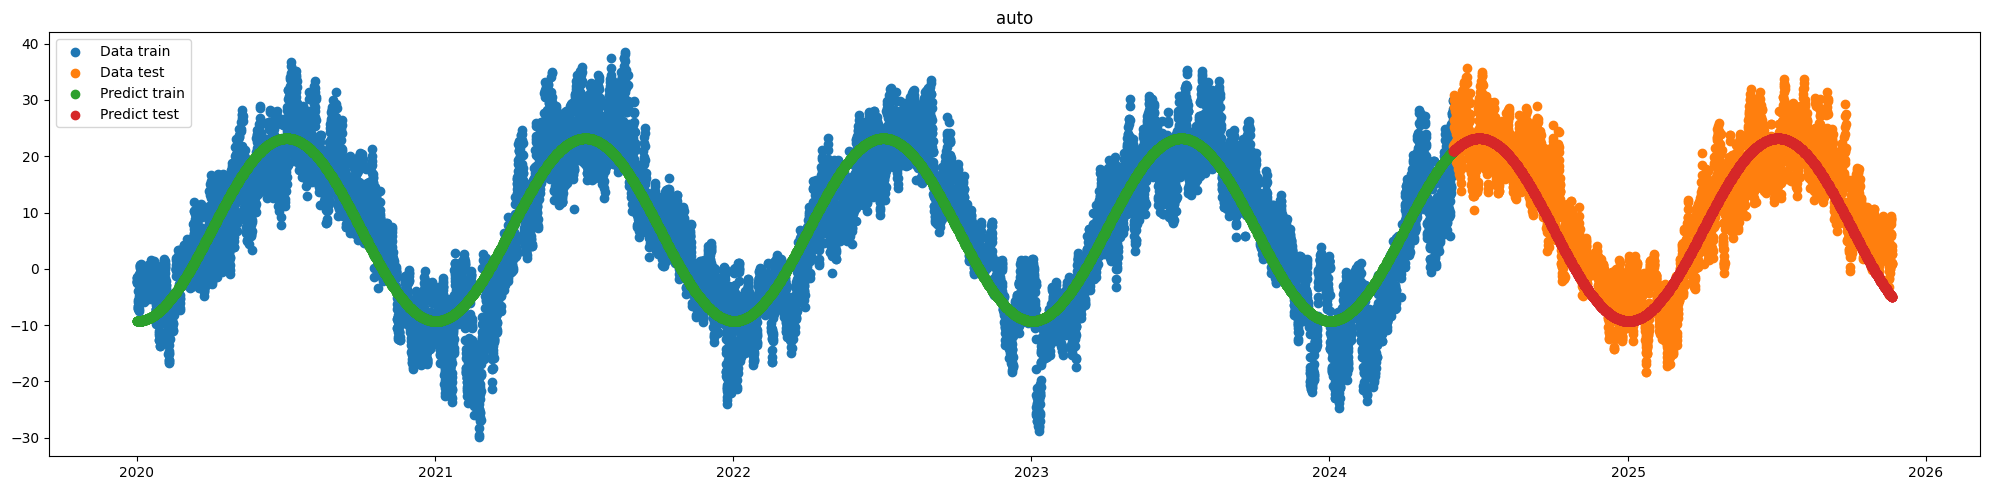

  model  mae_train  mae_test
0  auto   4.921435  4.687617




/tmp/ipython-input-1801915320.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


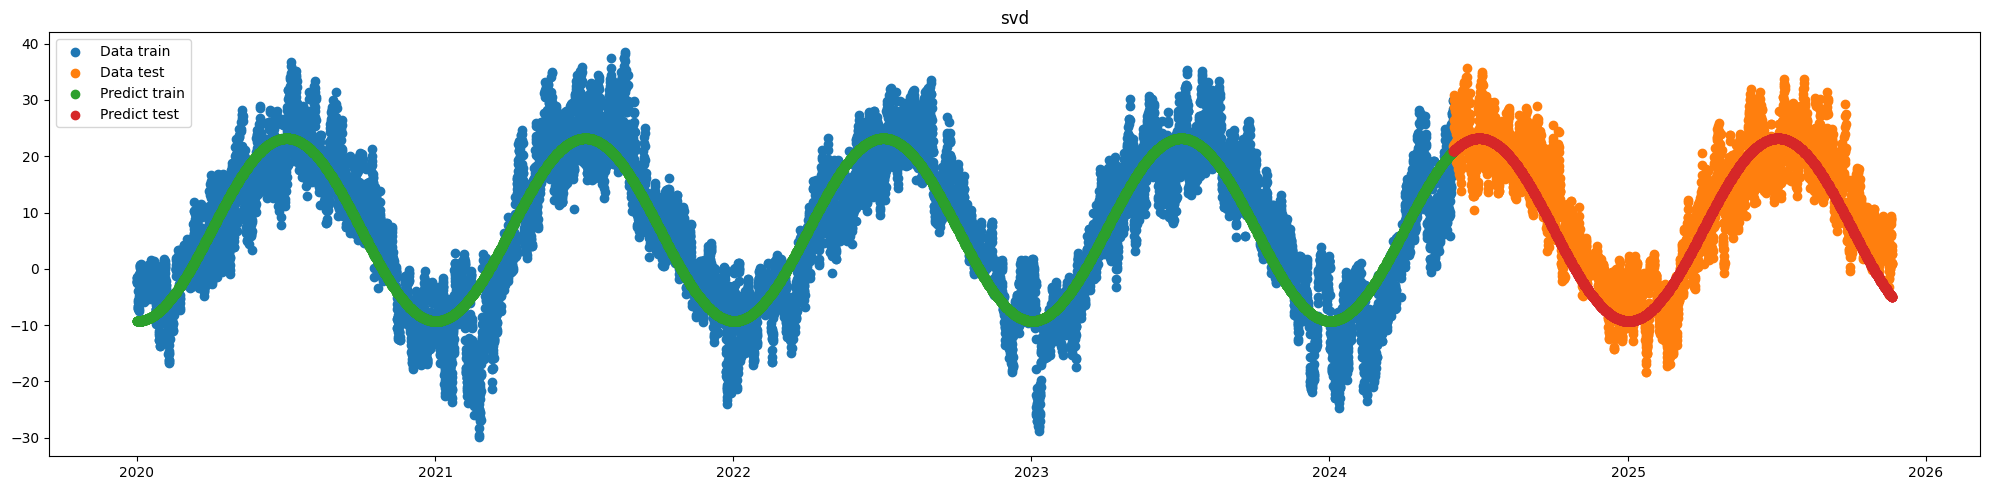

  model  mae_train  mae_test
0   svd   4.921435  4.687617




/tmp/ipython-input-1801915320.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


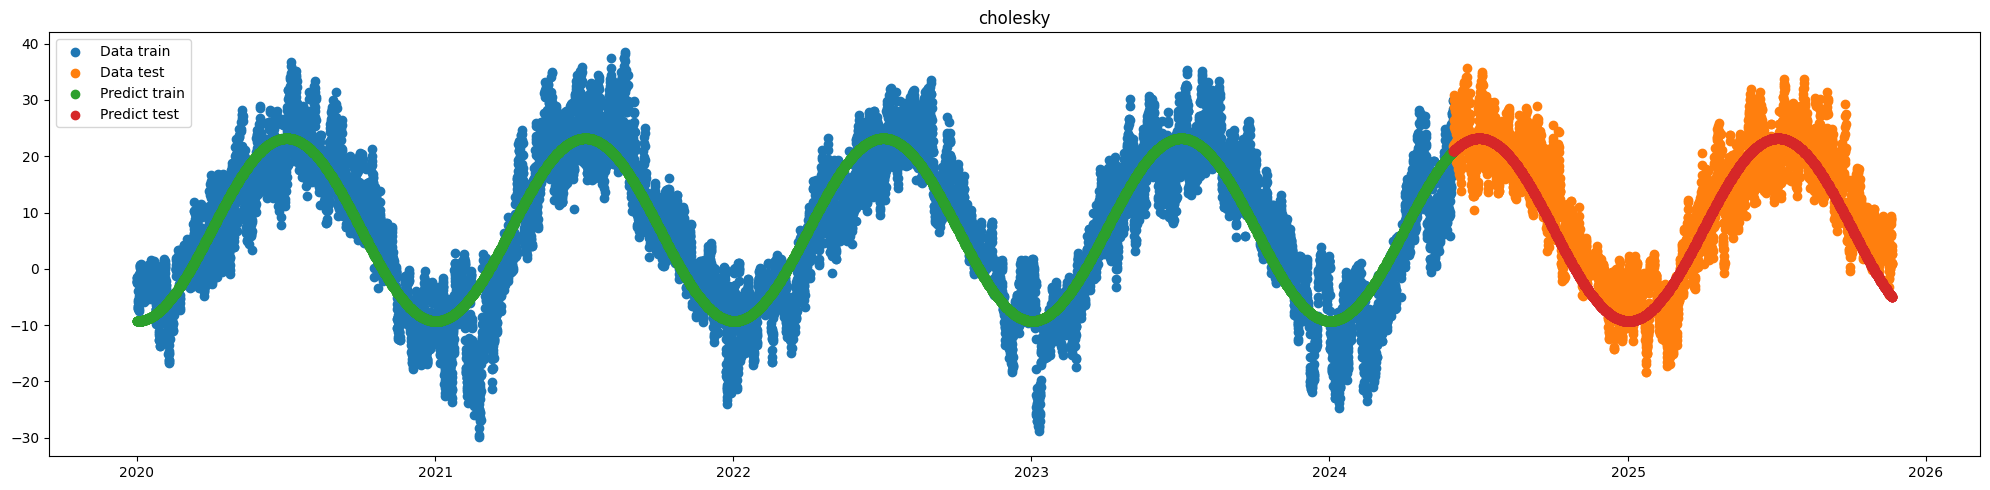

      model  mae_train  mae_test
0  cholesky   4.921435  4.687617




/tmp/ipython-input-1801915320.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


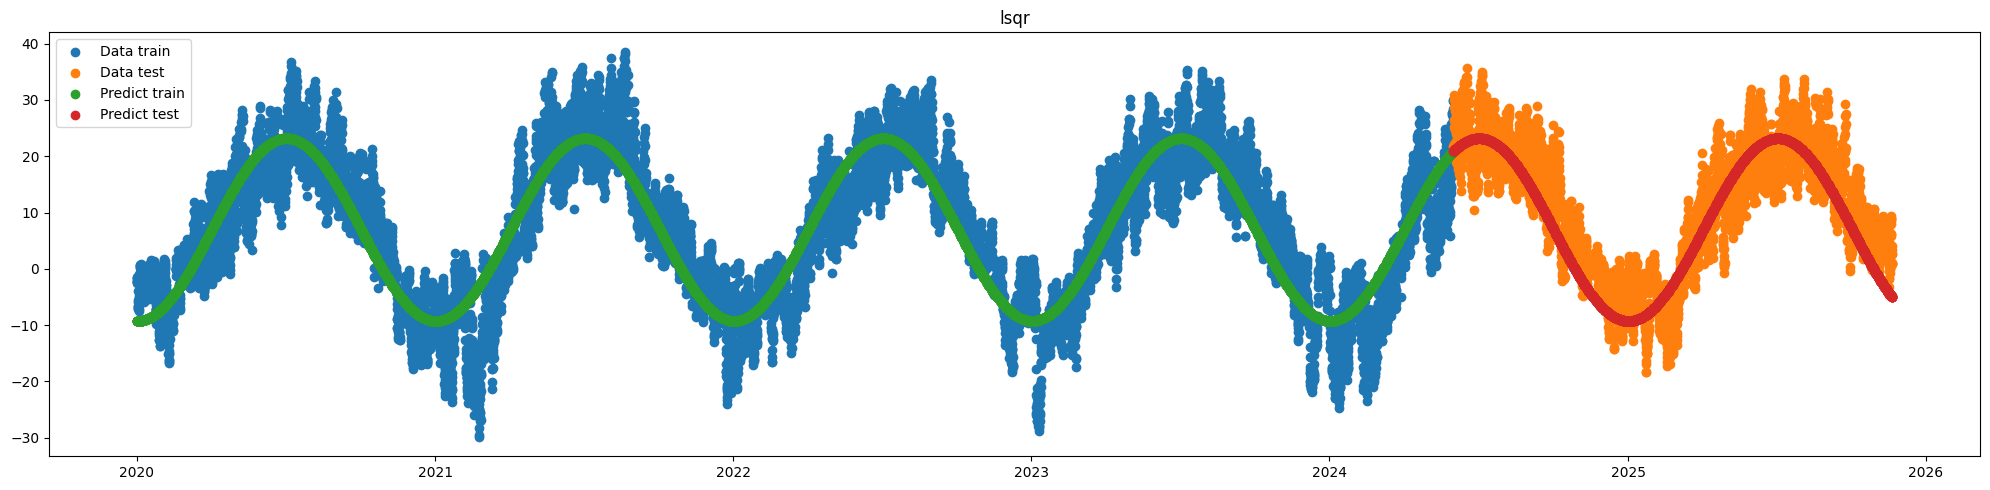

  model  mae_train  mae_test
0  lsqr   4.921435  4.687617




/tmp/ipython-input-1801915320.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


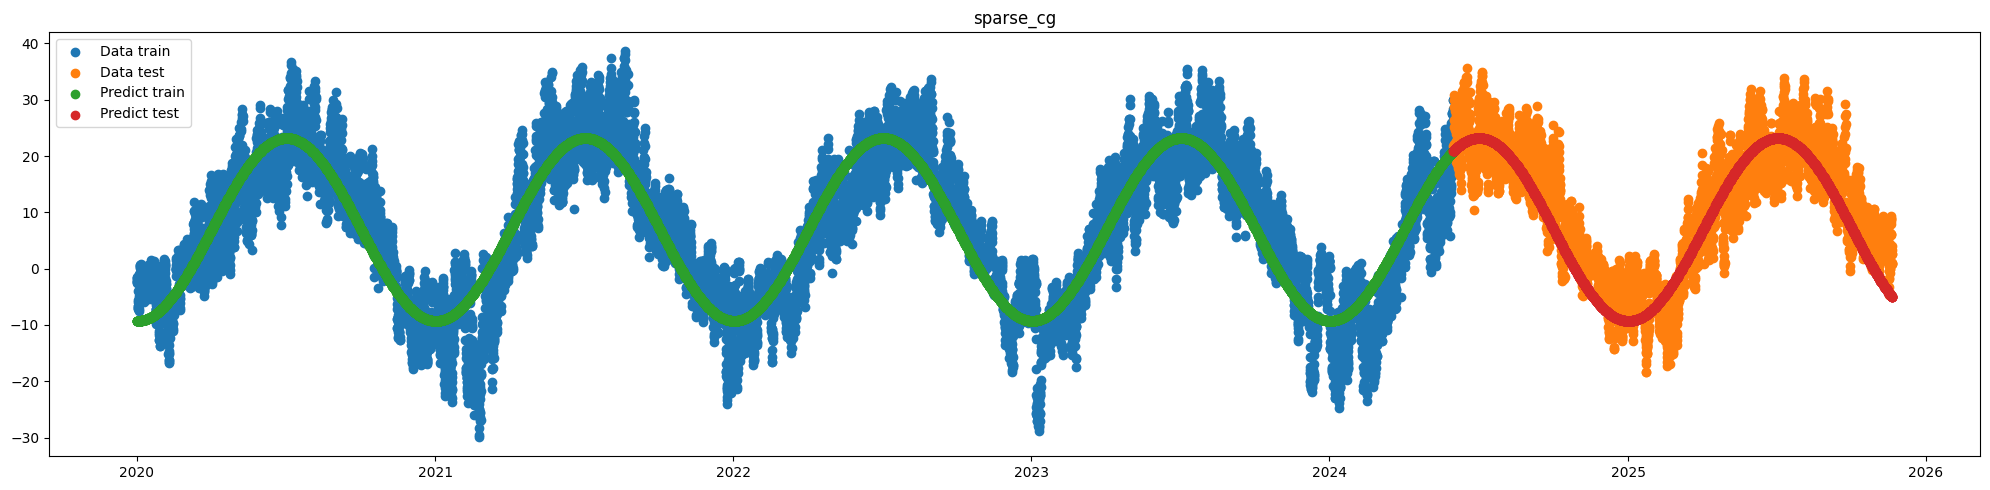

       model  mae_train  mae_test
0  sparse_cg   4.921435  4.687617




/tmp/ipython-input-1801915320.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


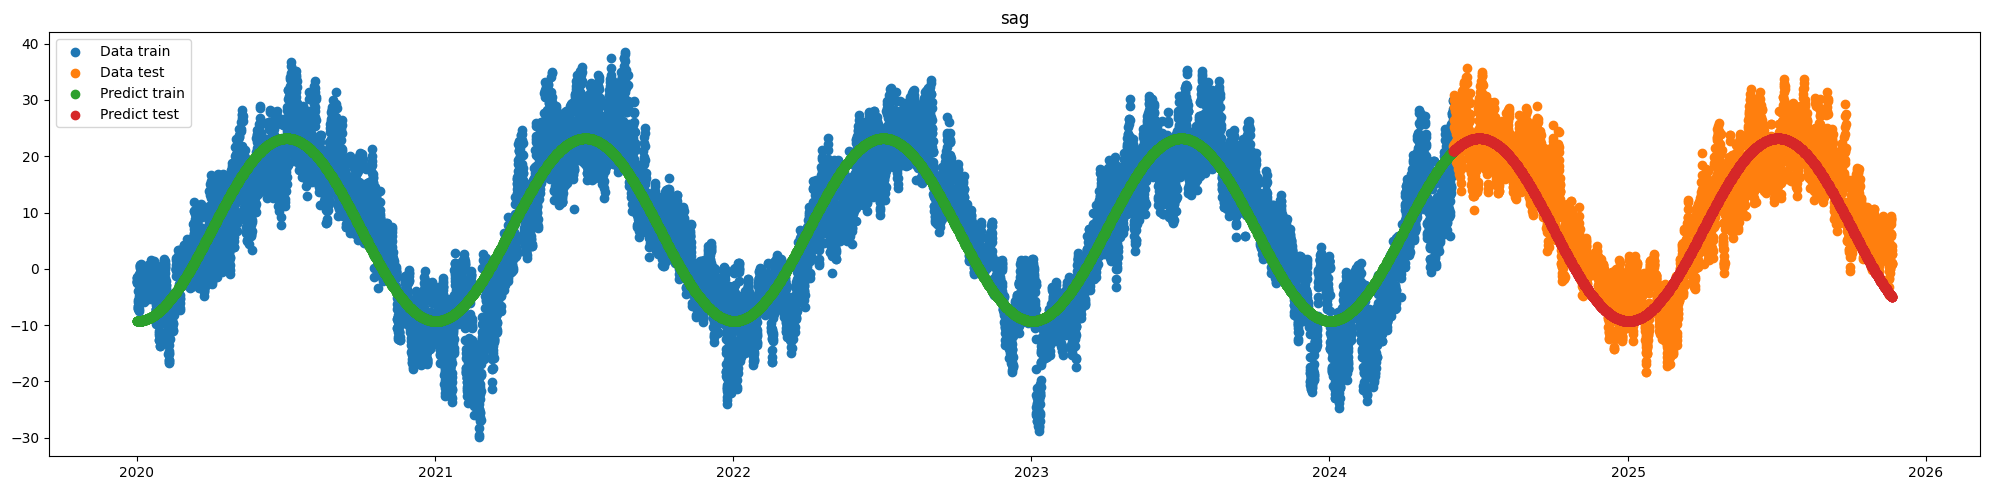

  model  mae_train  mae_test
0   sag   4.921289  4.687039




/tmp/ipython-input-1801915320.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


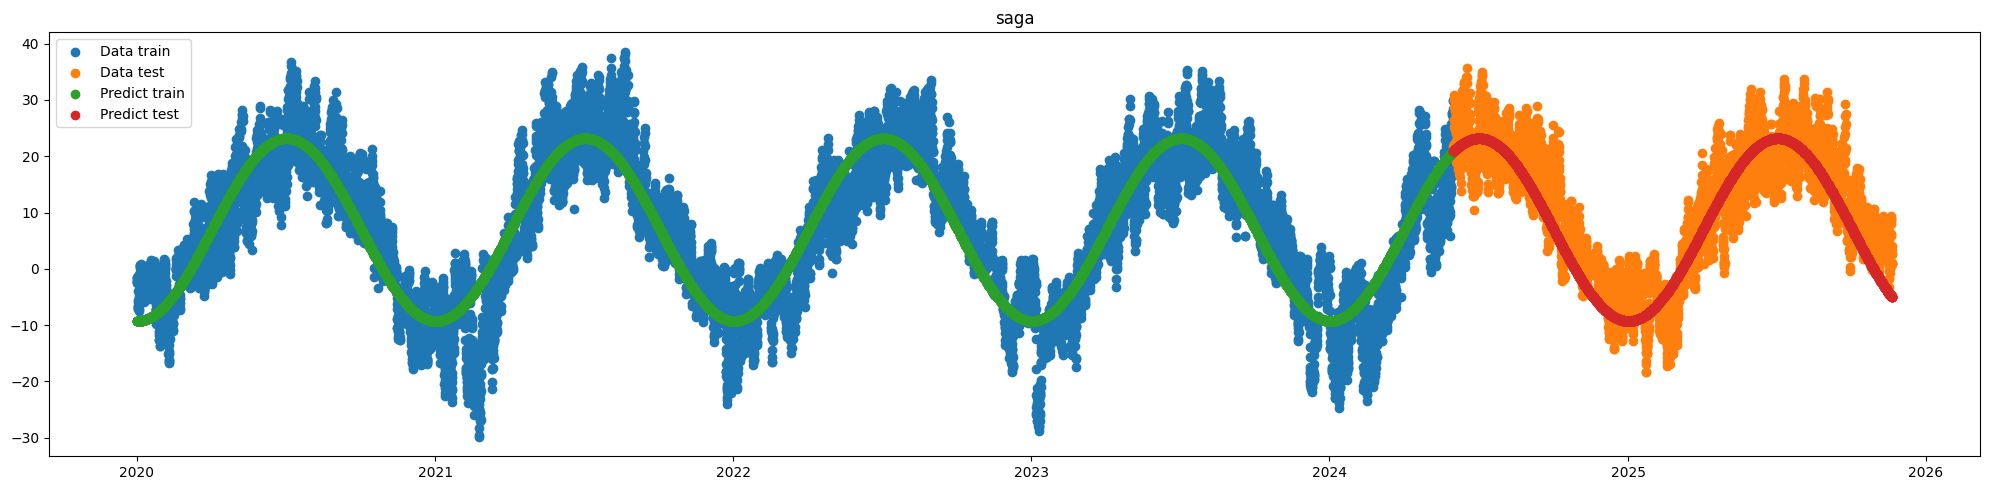

  model  mae_train  mae_test
0  saga   4.921411  4.687522




/tmp/ipython-input-1801915320.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


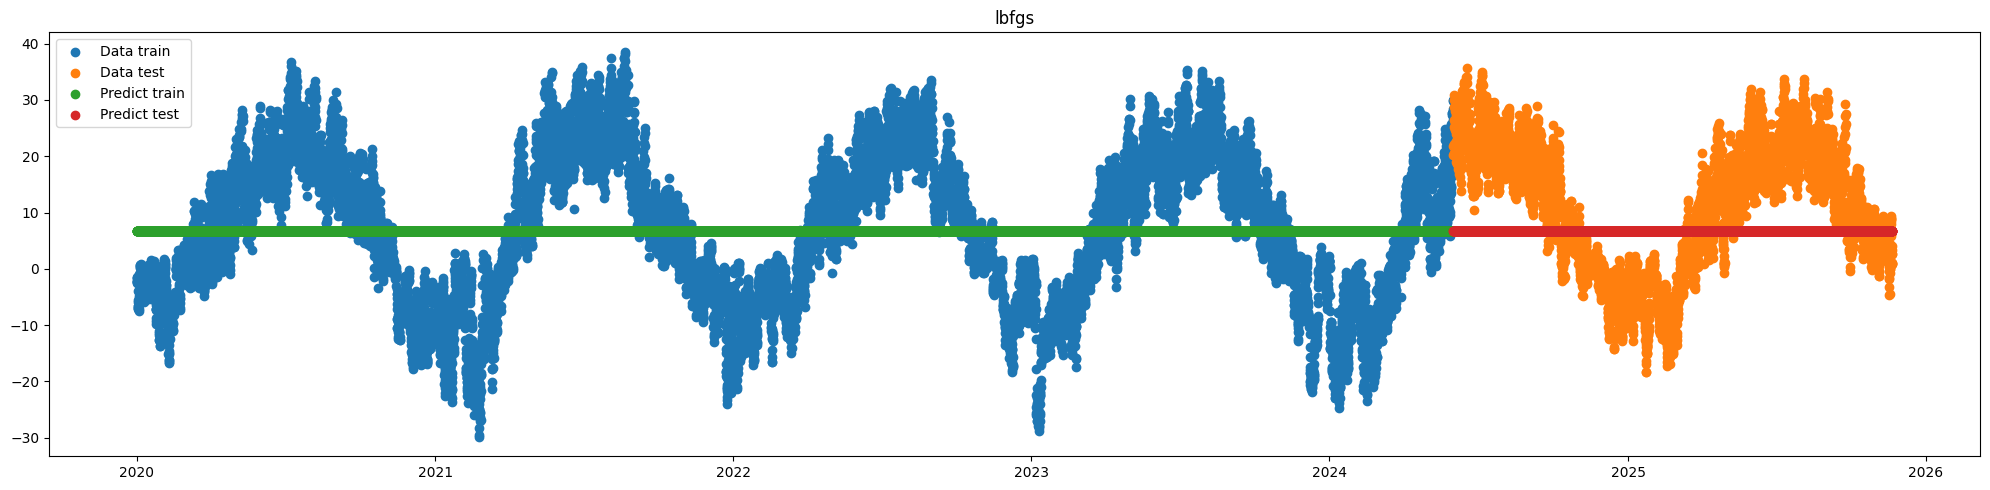

   model  mae_train   mae_test
0  lbfgs  10.938434  10.179487




In [27]:
solvers = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]

for solver in solvers:
    Ridge_model = make_pipeline(
        StandardScaler(),
        Ridge(
            solver=solver,
            positive=True if solver == "lbfgs" else False
        )
    )

    Ridge_model.fit(x_train, y_train)

    y_pred_train = Ridge_model.predict(x_train)
    y_pred_test = Ridge_model.predict(x_test)

    plt.figure(figsize=(20, 5))
    plt.title(f"{solver}")
    plt.scatter(x["date"], y_train, label="Data train")
    plt.scatter(y["date"], y_test, label="Data test")
    plt.scatter(x["date"], y_pred_train, label="Predict train")
    plt.scatter(y["date"], y_pred_test, label="Predict test")
    plt.legend()

    comparison = pd.DataFrame(columns = ["model", "mae_train", "mae_test"])
    new_row = pd.DataFrame([{
        "model": solver,
        "mae_train": mean_absolute_error(y_train, y_pred_train),
        "mae_test": mean_absolute_error(y_test, y_pred_test)
    }])
    comparison = pd.concat([comparison, new_row], ignore_index=True)

    plt.tight_layout()
    plt.show()
    print(comparison)
    print("\n")

## 4. Lin + SGD + sin

In [28]:
x_train = pd.DataFrame(x["sin_dayofyear"])
x_test = pd.DataFrame(y["sin_dayofyear"])

In [29]:
SGD_model = make_pipeline(
    StandardScaler(),
    SGDRegressor()
)

SGD_model.fit(x_train, y_train)

y_pred_train = SGD_model.predict(x_train)
y_pred_test = SGD_model.predict(x_test)

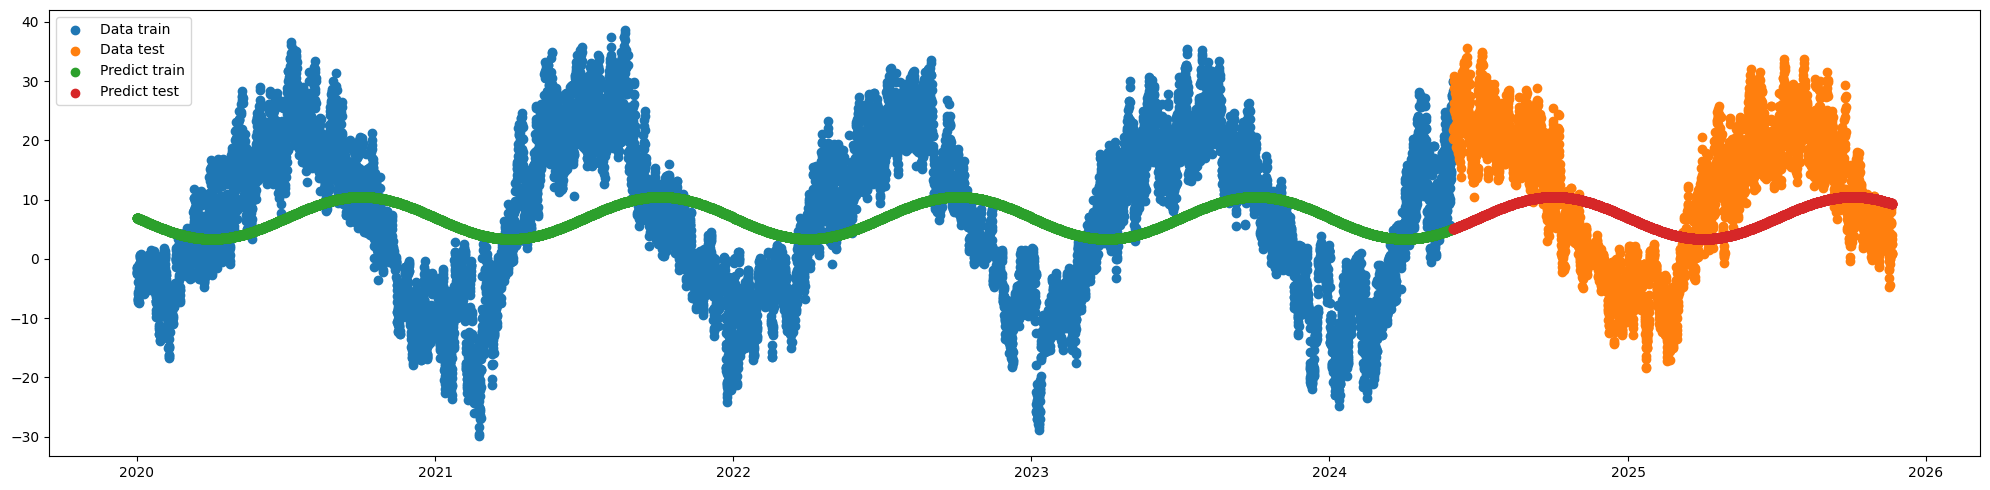

In [30]:
plt.figure(figsize=(20, 5))
plt.scatter(x["date"], y_train, label="Data train")
plt.scatter(y["date"], y_test, label="Data test")
plt.scatter(x["date"], y_pred_train, label="Predict train")
plt.scatter(y["date"], y_pred_test, label="Predict test")
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
comparison = pd.DataFrame(columns = ["model", "mae_train", "mae_test"])
new_row = pd.DataFrame([{
    "model": "SGDRegression",
    "mae_train": mean_absolute_error(y_train, y_pred_train),
    "mae_test": mean_absolute_error(y_test, y_pred_test)
}])
comparison = pd.concat([comparison, new_row], ignore_index=True)

comparison

/tmp/ipython-input-3307007381.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


,model,mae_train,mae_test
0,SGDRegression,10.747153,9.940838
